# Evolution of Critical Data Scientist Skills 2023: Trends and Insights

This notebook examines how essential skills for Data Scientists evolved over the course of 2023 in Europe. Using advanced visualization techniques, we analyze both raw counts and normalized percentages of skill mentions over time to capture seasonal and market-driven shifts.

## Chapter 1: Environment Setup and Data Acquisition

In this chapter, we import the necessary libraries, set configuration parameters, and load the dataset containing European job postings.

In [1]:
from helper_scripts.prepare_dataframe import get_european_dataframe
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
from matplotlib.ticker import PercentFormatter

# Configuration parameters
TOP_SKILLS_TREND = 5   # Number of top skills to display in trend plots
FIG_WIDTH = 10
FIG_HEIGHT = 6

# Load the dataset containing European job postings
jobs_df = get_european_dataframe()

*By setting up our environment and loading the job posting data, we lay the groundwork for analyzing the evolution of critical skills among Data Scientists throughout 2023.*

## Chapter 2: Data Preprocessing for Trend Analysis

Here, we isolate Data Scientist roles and extract the month from the job posting dates. Then, by exploding the `job_skills` column, we create a pivot table that aggregates skill counts by month.

In [2]:
# Focus on Data Scientist roles and extract the month from posting dates
ds_df = jobs_df[jobs_df["job_title_short"] == "Data Scientist"].copy()
ds_df["job_posted_month_no"] = ds_df["job_posted_date"].dt.month

# Explode the 'job_skills' column so that each skill becomes a separate row
ds_skills_exploded = ds_df.explode("job_skills")

# Build a pivot table counting the number of occurrences of each skill per month
skills_pivot = ds_skills_exploded.pivot_table(
    index="job_posted_month_no",
    columns="job_skills",
    aggfunc="size",
    fill_value=0
)

# Append a "Total" row to order skills by overall frequency
skills_pivot.loc["Total"] = skills_pivot.sum()
# Order columns descending by overall count and then remove the Total row
skills_pivot_ordered = skills_pivot[skills_pivot.loc["Total"].sort_values(ascending=False).index]
skills_pivot_ordered = skills_pivot_ordered.drop("Total")

# For raw count trends, consider only the TOP_SKILLS_TREND most common skills
skills_count_trend = skills_pivot_ordered.iloc[:, :TOP_SKILLS_TREND]

*By transforming the raw data into a pivoted format, we can now observe how frequently each top skill is mentioned each month throughout the year.*

## Chapter 3: Analyzing Raw Count Trends of Top Skills

This chapter visualizes the evolution of raw counts of critical skill mentions over the months using a line plot. Chart elements like titles, axis labels, and tick marks are employed to guide interpretation.

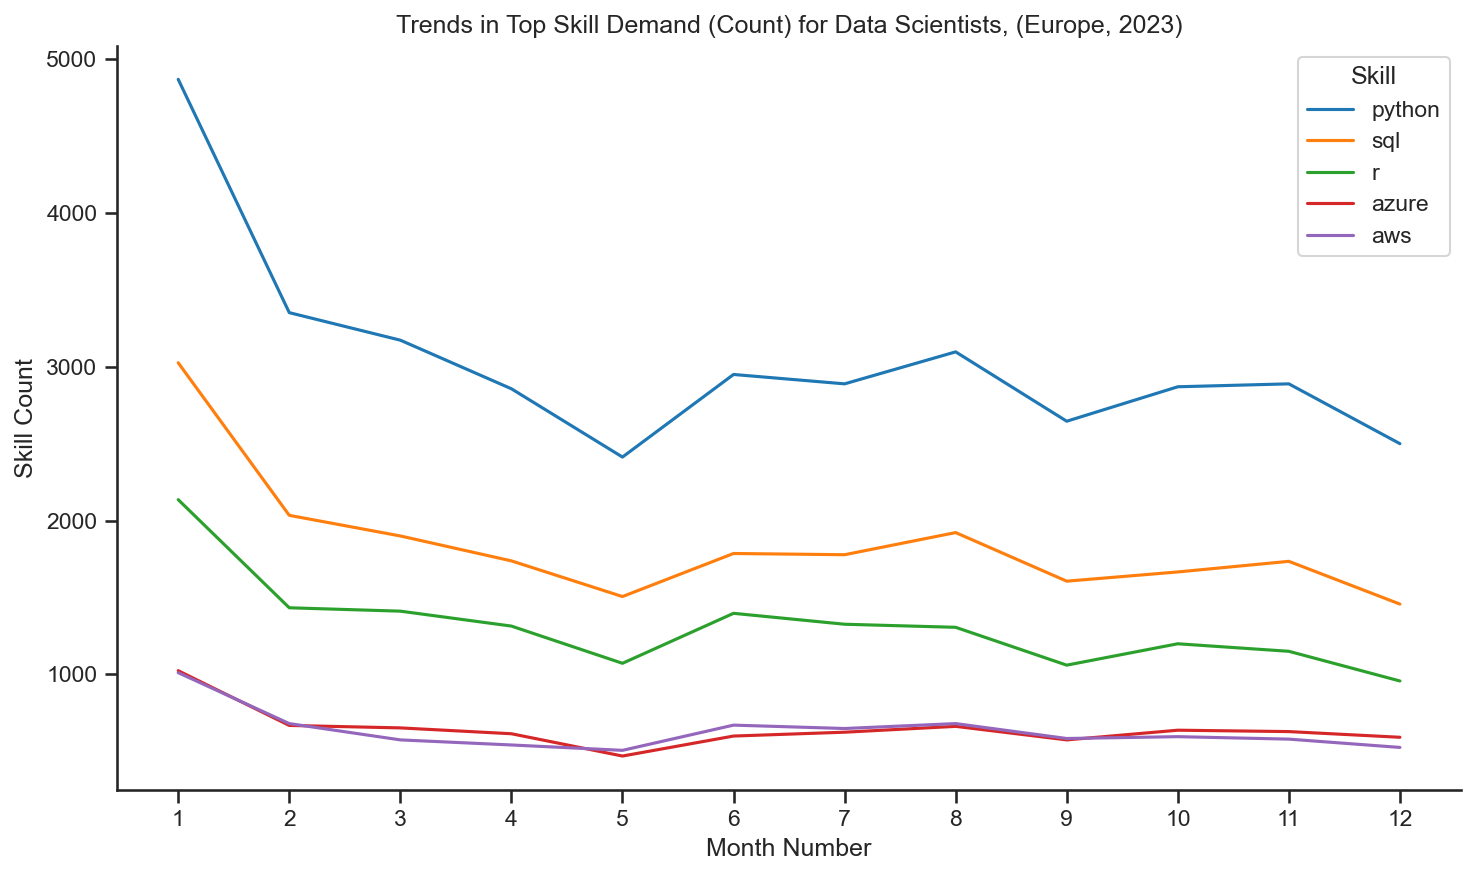

In [6]:
plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT), dpi=150)
sns.set_theme(style="ticks")
sns.lineplot(data=skills_count_trend, dashes=False, markers=False, palette="tab10")
sns.despine() # remove top and right spines
plt.title("Trends in Top Skill Demand (Count) for Data Scientists, (Europe, 2023)")
plt.xlabel("Month Number")
plt.ylabel("Skill Count")
plt.xticks(range(1, 13))
plt.legend(title="Skill")
plt.tight_layout()
plt.show()

*The raw count trends graph illustrates the fluctuations in demand for specific skills throughout 2023. These variations may reflect seasonal hiring patterns or shifts in technology emphasis.*

## Chapter 4: Converting Raw Counts to Normalized Percentages

To account for fluctuations in the total number of job postings per month, we normalise the skill counts by converting them into percentages. This standardization allows us to compare relative importance across months.

In [4]:
# Calculate total Data Scientist postings per month
monthly_totals_ds = ds_df.groupby("job_posted_month_no").size()

# Convert counts to percentages based on monthly totals
skills_percent = skills_pivot_ordered.div(monthly_totals_ds / 100, axis=0)
skills_percent = skills_percent.reset_index()

# Map month numbers to abbreviated month names
skills_percent["month_abbr"] = skills_percent["job_posted_month_no"].apply(
    lambda x: pd.to_datetime(x, format="%m").strftime("%b")
)
skills_percent = skills_percent.set_index("month_abbr")
skills_percent.drop(columns="job_posted_month_no", inplace=True)

# Focus on the top skills percentage trends
skills_percent_trend = skills_percent.iloc[:, :TOP_SKILLS_TREND]

*Normalizing into percentages gives us a clearer perspective on how the relative importance of each skill shifts over time regardless of monthly posting volume.*

## Chapter 5: Visualizing Normalized Skill Trends

The second plot depicts the percentage trends for the top skills, with the y-axis formatted to display percentages. Skill names are annotated at the final data point for clarity.

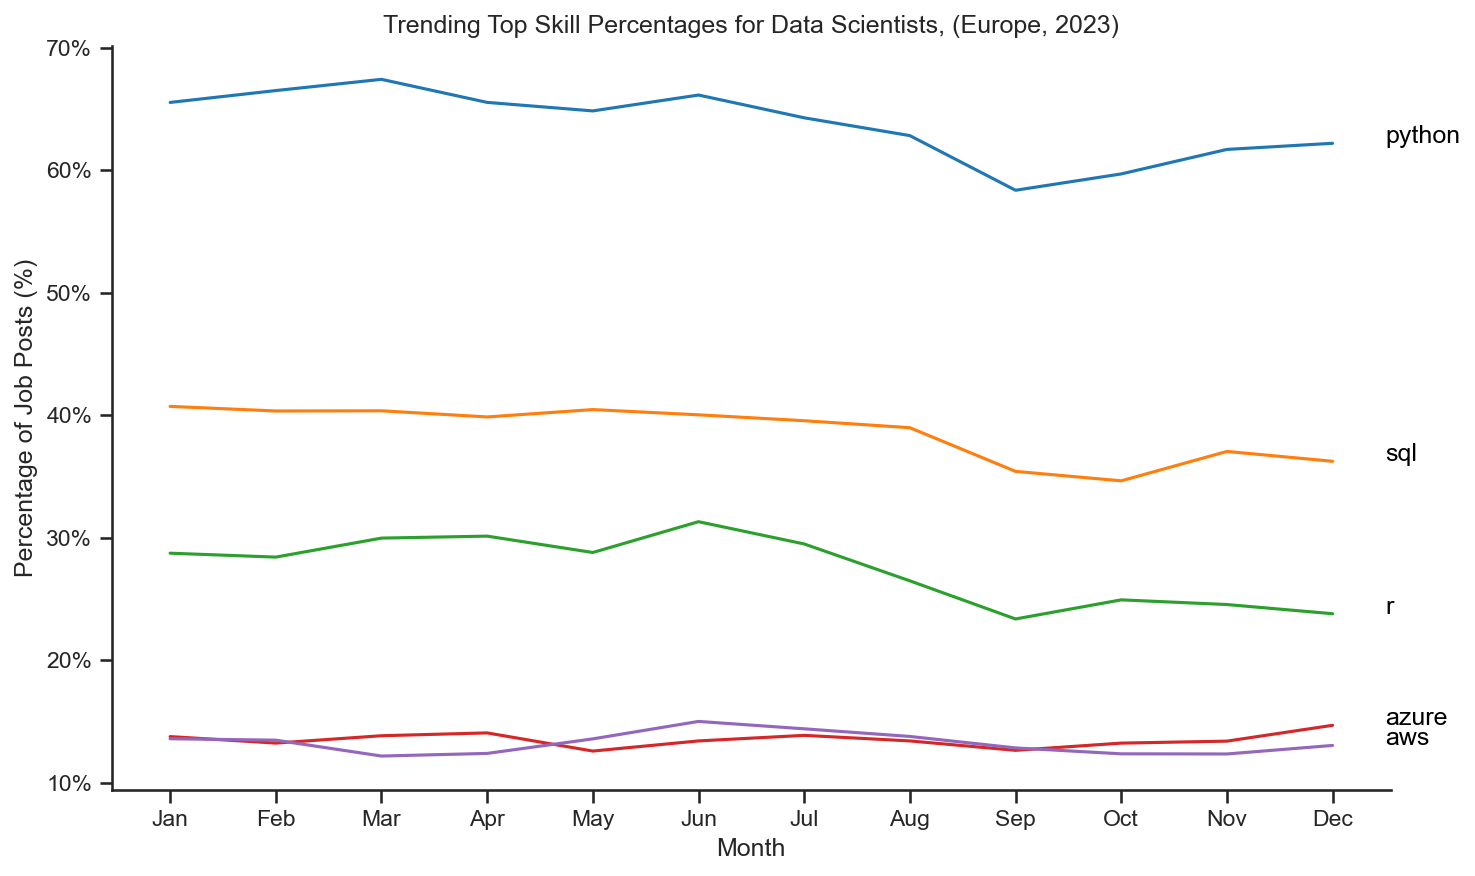

In [7]:
plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT), dpi=150)
sns.set_theme(style="ticks")
sns.lineplot(data=skills_percent_trend, dashes=False, markers=False, palette="tab10")
sns.despine()  # remove top and right spines
plt.title("Trending Top Skill Percentages for Data Scientists, (Europe, 2023)")
plt.xlabel("Month")
plt.ylabel("Percentage of Job Posts (%)")
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# Annotate each line at the final month with the skill name for clarity
for idx, skill in enumerate(skills_percent_trend.columns):
    plt.text(x=11.5, y=skills_percent_trend.iloc[-1, idx], s=f"{skill}", color="black")

plt.tight_layout()
plt.show()

*By using normalized percentage trends, this visualization facilitates comparisons even in months with variable job posting volumes.*

## Chapter 6: Key Insights from the Trend Analysis

The analysis of skill trends for Data Scientists in 2023 reveals several important observations:

- **Python:**  
  - In early 2023, approximately 66–67% of job postings highlighted Python as a key requirement.  
  - A noticeable dip to around 58–60% is observed in September and October, suggesting some seasonal or market shift, before a slight recovery toward the end of the year. Despite these variations, Python remains a highly valued skill.

- **SQL:**  
  - SQL maintained a stable presence, starting at roughly 40% and then gradually declining to the mid-30s by year-end.  
  - This steady downward trend may indicate a shift in priorities or an increased reliance on other complementary data handling skills.

- **R:**  
  - Demand for R peaked during mid-year—around 31% in June—underscoring its importance at that point.  
  - The subsequent decline to approximately 23–24% later in the year suggests evolving preferences for statistical tools or the integration of alternative approaches in data analysis.

- **Cloud Skills (Azure and AWS):**  
  - **Azure** maintained a relatively consistent presence of around 13%, with a slight boost in December, reflecting steady demand for Microsoft’s cloud solutions.  
  - **AWS** experienced fluctuations, peaking mid-year at around 15% in June before declining towards the end of the year.  
  - The varying trends in cloud skills highlight the dynamic nature of employer demands in cloud-based data infrastructure.

*These insights demonstrate that while core competencies like Python continue to dominate, other skills such as SQL, R, and cloud platform expertise are subject to dynamic shifts throughout the year.*

## Final Remarks

This notebook has provided a detailed trend analysis of critical skills for Data Scientists in Europe over 2023. By combining both raw and normalized insights, we uncover nuanced dynamics that reflect seasonal patterns and shifting market demands. Such analyses are essential for professionals aiming to align their skill development with evolving industry trends.